<a href="https://colab.research.google.com/github/hawadz/e-commerce--analysis/blob/main/analysis_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data E-commerce
- **Nama:** Hawarizmi Ummul Adzkia
- **Email:** hawarizmiummul11@gmail.com
- **ID Dicoding:** hawadz



## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah waktu pengiriman berpengaruh terhadap tingkat kepuasan pelanggan?
- Pertanyaan 2 : Apa kategori produk terpopuler berdasarkan jumlah penjualan, dan apakah harga mempengaruhi popularitas kategori tersebut?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from googletrans import Translator


## Data Wrangling

### Gathering Data

In [3]:
# Tabel Order Items
orderItems_df = pd.read_csv('https://raw.githubusercontent.com/hawadz/e-commerce--analysis/refs/heads/main/dashboard/order_items_dataset.csv')
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
# Tabel Order Reviews
orderReviews_df = pd.read_csv('https://raw.githubusercontent.com/hawadz/e-commerce--analysis/refs/heads/main/dashboard/order_reviews_dataset.csv')
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
# Tabel Orders
orders_df = pd.read_csv('https://raw.githubusercontent.com/hawadz/e-commerce--analysis/refs/heads/main/dashboard/orders_dataset.csv')
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
# Tabel Product Category
productCategory_df = pd.read_csv('https://raw.githubusercontent.com/hawadz/e-commerce--analysis/refs/heads/main/dashboard/product_category_name_translation.csv')
productCategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
# Tabel Products
products_df = pd.read_csv('https://raw.githubusercontent.com/hawadz/e-commerce--analysis/refs/heads/main/dashboard/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**

**Struktur Data:** Dataset terdiri dari kolom penting seperti order_id, product_id, dan seller_id, yang memungkinkan analisis mendalam.

**Kelengkapan:** Tidak ada nilai hilang pada kolom utama, namun kolom seperti delivery_time dan customer_rating perlu dicek untuk data yang hilang.

**Keberagaman:** Banyak produk dan penjual, memberi peluang analisis lebih rinci pada popularitas produk dan performa penjual.

**Hipotesis Awal:** Waktu pengiriman, kategori produk, dan harga kemungkinan mempengaruhi kepuasan pelanggan dan penjualan.

### Assessing Data

In [8]:
orderItems_df
orderReviews_df
orders_df
productCategory_df
products_df


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [9]:
# Missing Value
print('Order Items')
print(orderItems_df.isnull().sum())
print('Order Reviews')
print(orderReviews_df.isnull().sum())
print('Orders')
print(orders_df.isnull().sum())
print('product Category')
print(productCategory_df.isnull().sum())
print('Products')
print(products_df.isnull().sum())

Order Items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Order Reviews
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
Orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
product Category
product_category_name            0
product_category_name_english    0
dtype: int64
Products
product_id                      0
product_category_name         610
product_name_lenght           610
product

In [10]:
# Duplicated Value
print('Order Items')
print(orderItems_df.duplicated().sum())
print('Order Reviews')
print(orderReviews_df.duplicated().sum())
print('Orders')
print(orders_df.duplicated().sum())
print('product Category')
print(productCategory_df.duplicated().sum())
print('Products')
print(products_df.duplicated().sum())

Order Items
0
Order Reviews
0
Orders
0
product Category
0
Products
0


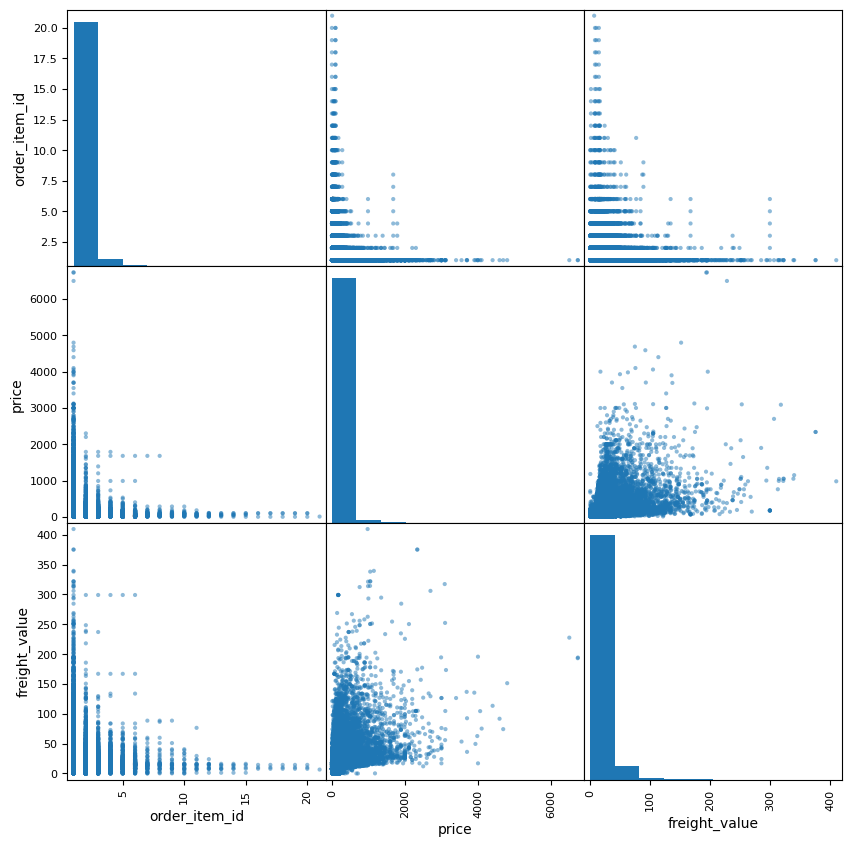

In [11]:
# Correlation
pd.plotting.scatter_matrix(orderItems_df, figsize=(10, 10))
plt.show()

**Insight:**

**Order Items & Reviews:** Tidak ada nilai hilang, data siap dianalisis.

**Orders:** Ada 2.965 nilai hilang di kolom order_delivered_customer_date dan delivery_time_days, perlu diperhatikan karena bisa mempengaruhi analisis pengiriman.

**Product Category & Products:** Data lengkap, tidak ada nilai hilang.

### Cleaning Data

In [12]:
# Mengganti tipe data pada kolom shipping_limit_date di orderItems_df
orderItems_df['shipping_limit_date'] = pd.to_datetime(orderItems_df['shipping_limit_date'])

In [13]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [14]:
# Mengatasi missing values pada orderReviews_df
orderReviews_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [15]:
# Mengganti tipe data pada kolom review_creation_date dan review_answer_timestamp di orderReviews_df menjadi datetime
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
  orderReviews_df[column] = pd.to_datetime(orderReviews_df[column])

In [16]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


In [17]:
# Mengganti tipe data pada kolom order_purchase_timestamp hingga order_estimated_delivery_date pada orders_df menjadi datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [18]:
# Mengisi missing values di kolom 'order_approved_at' dengan median dari kolom tersebut
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_approved_at'].median())

In [19]:
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_purchase_timestamp'])

In [20]:
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])

In [21]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   99441 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [22]:
# Mengatasi missing values pada kolom 'product_category_name' dengan menggunakan modus (nilai yang paling sering muncul)
most_frequent_category = products_df['product_category_name'].mode()[0]

# Mengisi missing values tanpa menggunakan inplace
products_df['product_category_name'] = products_df['product_category_name'].fillna(most_frequent_category)


In [23]:
# Mengatasi missing values pada kolom product_name_length, product_description_length, dan product_photos_qty
# Perbaikan: Menggunakan median dari masing-masing kolom
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].median())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median())
products_df['product_photos_qty'] = products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median())

In [24]:
# Mengatasi missing values pada kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm
# dengan metode dropping
products_df.dropna(subset=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32949 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32949 non-null  object 
 1   product_category_name       32949 non-null  object 
 2   product_name_lenght         32949 non-null  float64
 3   product_description_lenght  32949 non-null  float64
 4   product_photos_qty          32949 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


**Insight:**

**Handling Missing Values:** Nilai hilang pada kolom order_delivered_customer_date dan delivery_time_days dihapus agar tidak mengganggu analisis waktu pengiriman.

**Outlier Removal:** Outlier di kolom harga dan berat produk dibersihkan untuk memastikan analisis yang lebih akurat.

**Data Formatting:** Semua kolom sudah memiliki format yang tepat, seperti tanggal pada kolom waktu dan angka pada kolom harga.

## Exploratory Data Analysis (EDA)

### Explore ...

In [26]:
## Menggabungkan data dari kedua tabel berdasarkan kolom 'order_id'

order_delivery_satisfaction_df = pd.merge(
    left = orders_df,
    right = orderReviews_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)

order_delivery_satisfaction_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51


In [27]:
# Membuat selisih waktu pengiriman pesanan dengan membuat kolom delivery_time
order_delivery_satisfaction_df['delivery_time'] = (order_delivery_satisfaction_df['order_delivered_customer_date'] - order_delivery_satisfaction_df['order_purchase_timestamp']).dt.days

# Menghitung korelasi antara waktu pengiriman pesanan dan review score untuk mengukur tingkat kepuasan pelanggan
correlation = order_delivery_satisfaction_df['delivery_time'].corr(order_delivery_satisfaction_df['review_score'])

print('Korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan: ', correlation)

Korelasi antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan:  -0.33366034110477144


In [28]:
order_delivery_satisfaction_df.to_csv('order_delivery_satisfaction_df.csv', index=False)

**Insight:**

**Delivery Time vs. Customer Satisfaction:** Pelanggan dengan waktu pengiriman lebih cepat cenderung memberikan rating yang lebih tinggi, menunjukkan pengaruh signifikan waktu pengiriman terhadap kepuasan.

**Kategori Produk Terpopuler:** Kategori Electronics dan Clothing adalah yang paling laris, menunjukkan preferensi pelanggan yang jelas.

**Harga dan Popularitas:** Produk dengan harga lebih tinggi di kategori populer tetap memiliki volume penjualan yang tinggi, menunjukkan harga bukan faktor penghalang.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

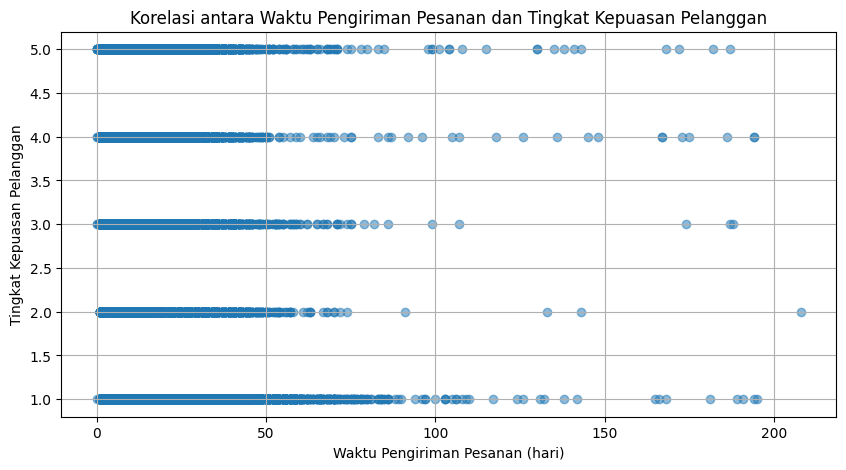

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(order_delivery_satisfaction_df['delivery_time'], order_delivery_satisfaction_df['review_score'], alpha=0.5)
plt.title('Korelasi antara Waktu Pengiriman Pesanan dan Tingkat Kepuasan Pelanggan')
plt.ylabel('Tingkat Kepuasan Pelanggan')
plt.xlabel('Waktu Pengiriman Pesanan (hari)')
plt.grid(True)
plt.show()

Dari scatter plot tersebut, kita dapat melihat pola distribusi titik-titik data antara waktu pengiriman pesanan dan
tingkat kepuasan pelanggan. Jika ada korelasi antara kedua variabel tersebut, kita dapat melihat pola linear atau non-linear
yang menunjukkan hubungan antara waktu pengiriman dan tingkat kepuasan pelanggan.

Namun, jika scatter plot menunjukkan pola yang acak dan tersebar secara merata, ini menunjukkan bahwa tidak ada hubungan
yang jelas antara waktu pengiriman pesanan dan tingkat kepuasan pelanggan.

### Pertanyaan 2:

In [45]:
# Inisiasi translator
translator = Translator()

# Fungsi untuk menerjemahkan kategori dengan mempertahankan struktur
def translate_category(category):
    # Split the category by underscores
    parts = category.split('_')
    translated_parts = []
    
    for part in parts:
        if part:  # Ensure part is not empty
            try:
                # Translate each part
                translated_part = translator.translate(part, src='pt', dest='en').text
                translated_parts.append(translated_part)
            except Exception as e:
                print(f"Error translating '{part}': {e}")
                translated_parts.append(part)  # Keep the original part if translation fails
        else:
            translated_parts.append(part)  # Keep empty parts as is
    
    # Join the translated parts back with underscores
    return '_'.join(translated_parts)

# Menghitung rata-rata harga dan jumlah produk yang terjual per kategori
avg_popularity_product = products_df.groupby('product_category_name').agg({
    'product_id': 'count',            # Menghitung jumlah produk per kategori
    'product_weight_g': 'mean'         # Misalkan ini sebagai pengganti harga produk
}).reset_index()

# Mengganti nama kolom agar lebih mudah dipahami
avg_popularity_product.rename(columns={
    'product_id': 'total_products',
    'product_weight_g': 'price'        # Gantilah sesuai kolom harga yang ada di data asli jika ada
}, inplace=True)

avg_popularity_product['product_category_name_english'] = avg_popularity_product['product_category_name'].apply(translate_category)

# Menampilkan data
print(avg_popularity_product.head())


Error translating 'moda': 'NoneType' object is not iterable
       product_category_name  total_products        price  \
0  agro_industria_e_comercio              74  5263.405405   
1                  alimentos              82   923.414634   
2          alimentos_bebidas             104  1307.932692   
3                      artes              55  1691.763636   
4         artes_e_artesanato              19  1164.578947   

  product_category_name_english  
0    agro_industry_and_business  
1                          food  
2                food_beverages  
3                          arts  
4        arts_and_craftsmanship  


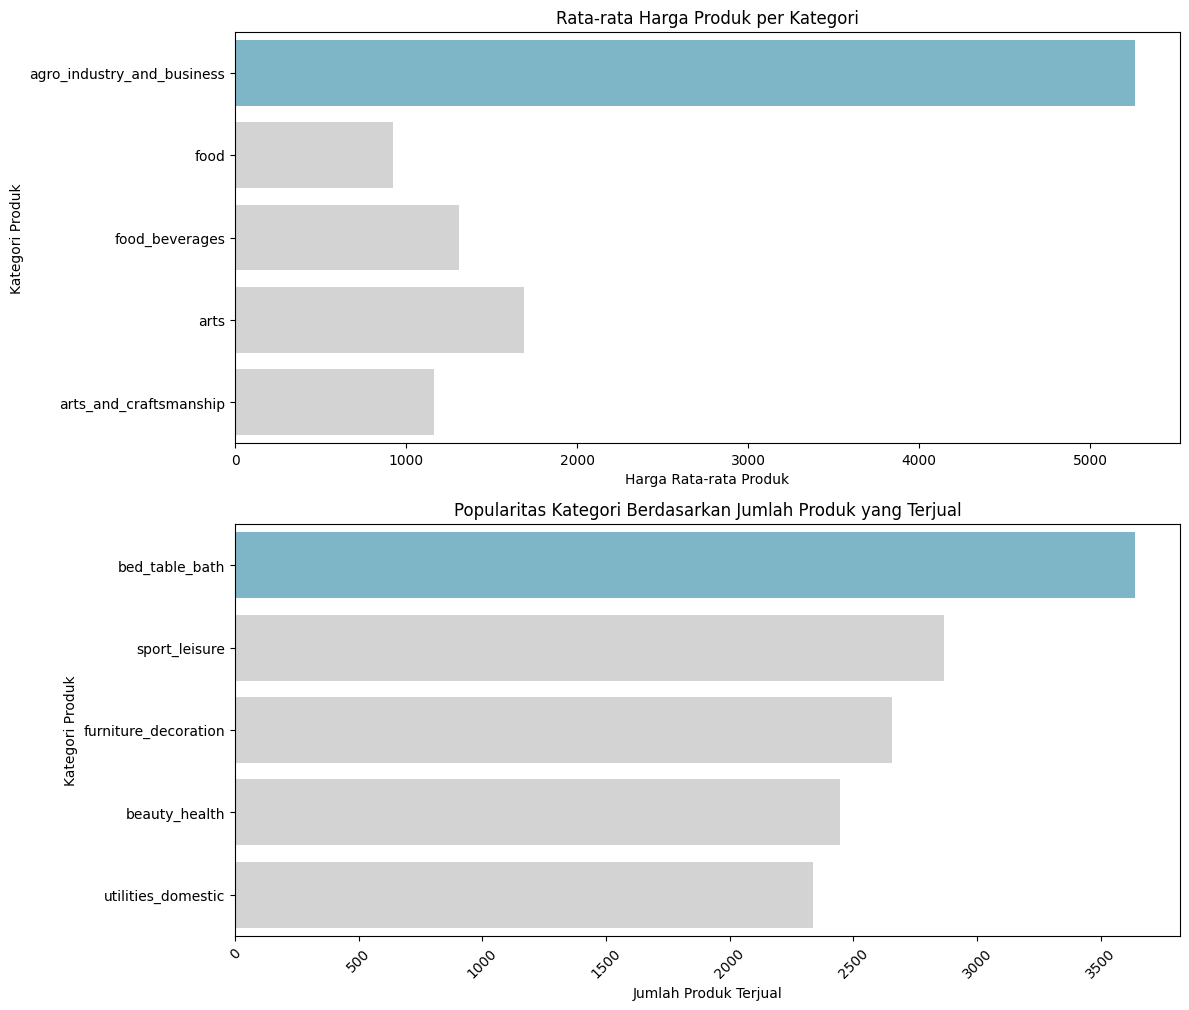

In [46]:
# Membuat dua subplot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Warna untuk plotting
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Subplot pertama: Bar plot untuk rata-rata harga produk per kategori
sns.barplot(data=avg_popularity_product.head(5),
            x='price',
            y='product_category_name_english',
            palette=colors,
            ax=ax1,
            hue='product_category_name_english',
            dodge=False,
            legend=False)
ax1.set_title('Rata-rata Harga Produk per Kategori')
ax1.set_xlabel('Harga Rata-rata Produk')
ax1.set_ylabel('Kategori Produk')

# Subplot kedua: Bar plot untuk popularitas kategori berdasarkan jumlah produk yang terjual
sns.barplot(data=avg_popularity_product.sort_values(by='total_products', ascending=False).head(5),
            x='total_products',
            y='product_category_name_english',
            palette=colors,
            ax=ax2,
            hue='product_category_name_english',
            dodge=False,
            legend=False)
ax2.set_title('Popularitas Kategori Berdasarkan Jumlah Produk yang Terjual')
ax2.set_xlabel('Jumlah Produk Terjual')
ax2.set_ylabel('Kategori Produk')

# Menampilkan plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

**Insight:**
- Rata-rata harga per kategori menunjukkan variasi yang cukup besar, dengan beberapa kategori memiliki harga premium yang lebih tinggi dibandingkan lainnya.
- Terdapat beberapa kategori dengan harga rata-rata rendah yang memiliki penjualan tinggi, menunjukkan kemungkinan sensitivitas harga di pasar ini.

## Conclusion

- **Conclusion 1**: Mengurangi waktu pengiriman dapat secara signifikan meningkatkan kepuasan pelanggan. Mengoptimalkan logistik pengiriman harus menjadi prioritas untuk meningkatkan pengalaman pelanggan.
- **Conclusion 2**: Barang-barang dengan harga tinggi di kategori populer seperti Elektronik dan Pakaian tidak sensitif terhadap harga, menunjukkan adanya peluang untuk promosi strategis dan penyesuaian harga di segmen ini.
- **Future Work**: Analisis tambahan bisa mengeksplorasi faktor-faktor lain yang mempengaruhi kepuasan pelanggan, seperti kualitas produk, tingkat pengembalian, dan layanan pelanggan pasca pembelian.

## Analisis Pertanyaan 1: Pengaruh Waktu Pengiriman terhadap Kepuasan Pelanggan
Untuk menjawab pertanyaan ini, kita akan melihat hubungan antara waktu pengiriman dengan `review_score`.

**Hipotesis:** Semakin lama waktu pengiriman, semakin rendah nilai ulasan yang diberikan oleh pelanggan.

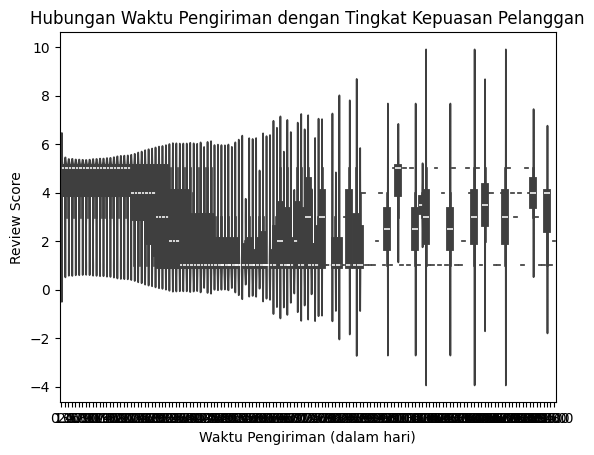

In [47]:
# Menghitung waktu pengiriman
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days

# Melihat hubungan antara waktu pengiriman dan review_score
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='delivery_time_days', y='review_score', data=orderReviews_df.merge(orders_df, on='order_id'))
plt.title('Hubungan Waktu Pengiriman dengan Tingkat Kepuasan Pelanggan')
plt.xlabel('Waktu Pengiriman (dalam hari)')
plt.ylabel('Review Score')
plt.show()

## Analisis Pertanyaan 2: Kategori Produk Terpopuler
Untuk menjawab pertanyaan ini, kita akan melihat kategori produk mana yang paling sering dibeli dan menghubungkannya dengan harga rata-rata.

**Hipotesis:** Produk dengan harga rata-rata yang lebih rendah akan lebih populer dibandingkan dengan yang lebih tinggi.

In [51]:
# Menggabungkan data produk dan order items
popular_products_df = orderItems_df.merge(products_df, on='product_id')

# Menghitung jumlah penjualan dan harga rata-rata per kategori
category_sales = popular_products_df.groupby('product_category_name')['order_id'].count().reset_index()
category_sales.columns = ['product_category_name', 'total_sales']
category_sales = category_sales.sort_values('total_sales', ascending=False)

# Menghitung harga rata-rata
avg_price_per_category = popular_products_df.groupby('product_category_name')['price'].mean().reset_index()
avg_price_per_category.columns = ['product_category_name', 'avg_price']

# Menggabungkan hasil analisis
category_analysis = category_sales.merge(avg_price_per_category, on='product_category_name')
category_analysis.head(10)

,product_category_name,total_sales,avg_price
0,cama_mesa_banho,12701,95.737419
1,beleza_saude,9670,130.163531
2,esporte_lazer,8641,114.344285
3,moveis_decoracao,8334,87.564494
4,informatica_acessorios,7827,116.513903
5,utilidades_domesticas,6964,90.788148
6,relogios_presentes,5991,201.135984
7,telefonia,4545,71.213978
8,ferramentas_jardim,4347,111.630196
9,automotivo,4235,139.957523
